In [1]:
import pandas as pd

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
accident = pd.read_csv(r'C:\Users\amnaj\Downloads\archive (1)\Accident_Information.csv', low_memory=False, chunksize=30000)
vehicle = pd.read_csv(r'C:\Users\amnaj\Downloads\archive (1)\Vehicle_Information.csv', low_memory=False, chunksize=30000,encoding='latin-1')

In [3]:
#chunk cleaning and dataframing for accident file
accident_chunk = []
for chunk in accident:
    accident_chunk_filter = chunk[
        (chunk.Year.astype(int) >= 2010) &
        (chunk.Year.astype(int) <= 2017) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Control'] != "Data missing or out of range") &
        (chunk['Carriageway_Hazards'] != "Data missing or out of range") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Special_Conditions_at_Site'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())
    ]
    accident_chunk.append(accident_chunk_filter)
df1 = pd.concat(accident_chunk)

In [4]:
#chunk cleaning for vehicles column
vehicle_chunk = []
for chunk2 in vehicle:
    vehicle_chunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2010)&
        (chunk2.Year.astype(int) <= 2017) &
        (chunk2['Driver_Home_Area_Type'] != "Data missing or out of range") &
        (chunk2['Journey_Purpose_of_Driver'] != "Data missing or out of range") &
        (chunk2['Junction_Location'] != "Data missing or out of range") &
        (chunk2['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range") &
        (chunk2['Hit_Object_in_Carriageway'] != "Data missing or out of range") &
        (chunk2['Skidding_and_Overturning'] != "Data missing or out of range") &
        (chunk2['Towing_and_Articulation'] != "Data missing or out of range") &
        (chunk2['Vehicle_Leaving_Carriageway'] != "Data missing or out of range") &
        (chunk2['Vehicle_Manoeuvre'] != "Data missing or out of range") &
        (chunk2['Vehicle_Type'] != "Data missing or out of range") &
        (chunk2['X1st_Point_of_Impact'] != "Data missing or out of range") &
        (chunk2['Sex_of_Driver'] != "Data missing or out of range") &
        (chunk2['Age_Band_of_Driver'] != "Data missing or out of range")
        
    ]
    vehicle_chunk.append(vehicle_chunk_filter)
df2 = pd.concat(vehicle_chunk)

In [5]:
df1.shape

(691195, 34)

In [6]:
df2.shape

(1167198, 24)

In [7]:
#merging dataframes
df = pd.merge(df1,df2)

In [8]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit

In [9]:
#check correlation between Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9994257015446207
0.9999733124707344


In [10]:
df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [11]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns = df.columns.str.replace('-','_')

In [12]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")

In [13]:
print(df.columns)

Index(['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class',
       '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'date',
       'day_of_week', 'did_police_officer_attend_scene_of_accident',
       'junction_control', 'junction_detail', 'latitude', 'light_conditions',
       'local_authority_district', 'local_authority_highway', 'longitude',
       'lsoa_of_accident_location', 'number_of_casualties',
       'number_of_vehicles', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'police_force',
       'road_surface_conditions', 'road_type', 'special_conditions_at_site',
       'speed_limit', 'time', 'urban_or_rural_area', 'weather_conditions',
       'year', 'inscotland', 'age_band_of_driver', 'age_of_vehicle',
       'driver_home_area_type', 'driver_imd_decile', 'engine_capacity_cc',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'journey_purpose_of_driver', 'junction_location', 'make', '

In [14]:
columns_to_convert = [
    'did_police_officer_attend_scene_of_accident',
    'driver_imd_decile',
    'vehicle_reference',
    'vehicle_locationrestricted_lane',
    '1st_road_number',
    '2nd_road_number',
    'pedestrian_crossing_physical_facilities',
    'pedestrian_crossing_human_control'
]

df[columns_to_convert] = df[columns_to_convert].astype('object')


In [15]:
df.shape

(720280, 54)

In [16]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

carriageway_hazards                            99.137558
special_conditions_at_site                     98.133087
hit_object_in_carriageway                      96.883573
hit_object_off_carriageway                     94.413561
skidding_and_overturning                       91.595213
driver_imd_decile                              25.118565
age_of_vehicle                                 15.287805
model                                          11.636447
engine_capacity_cc                             11.283251
propulsion_code                                10.899928
make                                            5.846476
lsoa_of_accident_location                       5.674738
2nd_road_class                                  2.894569
2nd_road_number                                 1.291303
pedestrian_crossing_physical_facilities         0.006109
pedestrian_crossing_human_control               0.005276
time                                            0.004582
speed_limit                    

In [17]:
df['2nd_road_class'].value_counts()/df.shape[0]*100

2nd_road_class
Unclassified    65.682512
A               15.892292
C                7.591909
B                6.494558
Motorway         1.301716
A(M)             0.142445
Name: count, dtype: float64

In [18]:
df = df.drop(['2nd_road_class'], axis=1)

In [19]:
df['driver_imd_decile'].value_counts()/df.shape[0]*100

driver_imd_decile
2.0     8.366469
3.0     8.281640
4.0     7.986339
1.0     7.888321
5.0     7.717554
6.0     7.530683
7.0     7.195674
8.0     6.948270
9.0     6.803049
10.0    6.163436
Name: count, dtype: float64

In [20]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\3239869356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['driver_imd_decile'].fillna(method='ffill', inplace=True)
C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\3239869356.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['driver_imd_decile'].fillna(method='ffill', inplace=True)
C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\3239869356.py:1: FutureWarning: Downcasting obje

In [21]:
df.shape

(720280, 53)

In [22]:
df['age_of_vehicle'].describe()

count    610165.000000
mean          7.567473
std           4.751567
min           1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         105.000000
Name: age_of_vehicle, dtype: float64

In [23]:
df['age_of_vehicle'].median()

7.0

In [24]:
#fillna by 7 
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\1115827109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_of_vehicle'].fillna(7, inplace=True)


In [25]:
df.shape

(720280, 53)

In [26]:
df['model'].value_counts()/df.shape[0]*100

model
MISSING                        0.743183
KA                             0.336675
CLIO DYNAMIQUE 16V             0.279058
FIESTA ZETEC                   0.247681
SPRINTER 313 CDI               0.236158
                                 ...   
400                            0.000139
308 ACCESS SW AUTO             0.000139
MERIVA EXPRESSION DTI          0.000139
DS3 DSPORT PINK AIRDREAM E-    0.000139
DAILY 35 C14 MWB               0.000139
Name: count, Length: 28664, dtype: float64

In [27]:
df['model'].describe()

count      636465
unique      28664
top       MISSING
freq         5353
Name: model, dtype: object

In [28]:
df['model'].fillna(method='ffill', inplace=True)

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\3933975539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model'].fillna(method='ffill', inplace=True)
C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\3933975539.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['model'].fillna(method='ffill', inplace=True)


In [29]:
df['engine_capacity_cc'].describe()

count    639009.000000
mean       1848.094816
std        1573.057956
min           2.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       91000.000000
Name: engine_capacity_cc, dtype: float64

In [30]:
import numpy as np
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3115.5
127.5


In [31]:
df = df[df['engine_capacity_cc']<=ecmax]

In [32]:
df = df[df['engine_capacity_cc']>=ecmin]

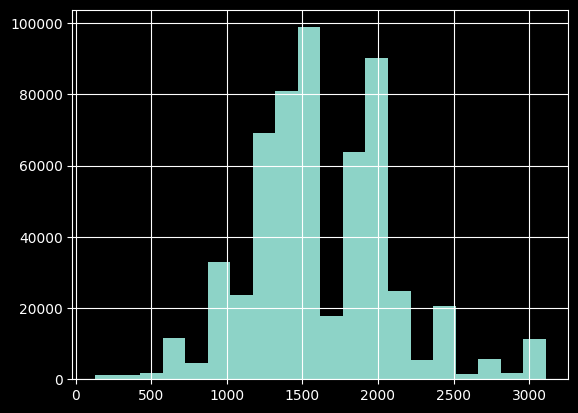

In [33]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

In [34]:
df['engine_capacity_cc'].describe()

count    569057.000000
mean       1633.351432
std         473.765085
min         128.000000
25%        1299.000000
50%        1598.000000
75%        1968.000000
max        3110.000000
Name: engine_capacity_cc, dtype: float64

In [35]:
df['engine_capacity_cc'].mean()

1633.3514322818276

In [36]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\470219815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine_capacity_cc'].fillna(1652, inplace=True)


In [37]:
df['lsoa_of_accident_location'].value_counts()

lsoa_of_accident_location
E01032739    440
E01004736    412
E01000004    410
E01018648    303
E01004689    261
            ... 
E01008724      1
E01008317      1
E01008531      1
E01027610      1
E01004700      1
Name: count, Length: 33936, dtype: int64

In [38]:
df['lsoa_of_accident_location'].describe()

count        535471
unique        33936
top       E01032739
freq            440
Name: lsoa_of_accident_location, dtype: object

In [39]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\2441318583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)
C:\Users\amnaj\AppData\Local\Temp\ipykernel_1700\2441318583.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)


In [40]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

carriageway_hazards                            99.172491
special_conditions_at_site                     98.139905
hit_object_in_carriageway                      96.792237
hit_object_off_carriageway                     93.836646
skidding_and_overturning                       92.130490
2nd_road_number                                 1.317618
make                                            0.063087
pedestrian_crossing_human_control               0.005448
pedestrian_crossing_physical_facilities         0.005096
time                                            0.003866
vehicle_locationrestricted_lane                 0.001406
speed_limit                                     0.001230
did_police_officer_attend_scene_of_accident     0.000176
journey_purpose_of_driver                       0.000000
engine_capacity_cc                              0.000000
driver_imd_decile                               0.000000
driver_home_area_type                           0.000000
age_of_vehicle                 

In [41]:
df['carriageway_hazards'].value_counts()/df.shape[0]*100

carriageway_hazards
Other object on road                               0.340739
Pedestrian in carriageway - not injured            0.157981
Any animal in carriageway (except ridden horse)    0.145328
Previous accident                                  0.100166
Vehicle load on road                               0.083296
Name: count, dtype: float64

In [42]:
df.shape

(569057, 53)

In [43]:
df3 = df

In [44]:
columns_to_drop = ['carriageway_hazards',
'special_conditions_at_site',
'hit_object_in_carriageway',
'hit_object_off_carriageway',
'skidding_and_overturning']
df3 = df3.drop(columns_to_drop, axis=1)

In [45]:
df3.dropna(inplace=True)

In [46]:
df3.shape

(561135, 48)

In [47]:
df3['number_of_casualties'].value_counts()

number_of_casualties
1     391938
2     113736
3      35451
4      12511
5       4621
6       1739
7        599
8        243
9        146
10        52
11        29
12        28
13        15
16        10
14         4
15         3
17         3
24         2
21         2
43         1
22         1
19         1
Name: count, dtype: int64

In [48]:
def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"

In [49]:
df3['number_of_casualties']= df3['number_of_casualties'].apply(casualities)

In [50]:
df3['number_of_casualties'].value_counts()

number_of_casualties
1     391938
2     113736
3      35451
4      12511
5+      7499
Name: count, dtype: int64

In [51]:
df = df3

In [53]:
df['propulsion_code'].value_counts()/df2.shape[0]*100

propulsion_code
Petrol                 29.104916
Heavy oil              18.530618
Hybrid electric         0.376286
Gas/Bi-fuel             0.045579
Petrol/Gas (LPG)        0.010195
Electric diesel         0.006340
Gas                     0.001114
New fuel technology     0.000171
Gas Diesel              0.000086
Fuel cells              0.000086
Name: count, dtype: float64

In [54]:
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [57]:
df['propulsion_code'].value_counts()/df.shape[0]*100

propulsion_code
Petrol                 60.542472
Heavy oil              38.544913
Hybrid electric         0.782699
Bio-fuel                0.094808
LPG Petrol              0.021207
Electric diesel         0.013188
New fuel technology     0.000356
Diesel                  0.000178
Fuel cells              0.000178
Name: count, dtype: float64

In [58]:
df.nunique().sort_values(ascending=False)

accident_index                                 412838
longitude                                      356283
latitude                                       346962
lsoa_of_accident_location                       33895
model                                           25688
2nd_road_number                                  5781
1st_road_number                                  5088
date                                             2557
time                                             1439
engine_capacity_cc                               1023
local_authority_district                          380
make                                              226
local_authority_highway                           207
police_force                                       51
vehicle_manoeuvre                                  18
vehicle_type                                       16
vehicle_reference                                  15
number_of_vehicles                                 15
age_band_of_driver          

In [59]:
# 561135
df.shape

(561135, 48)

In [61]:
df5 = df3

In [62]:
df['number_of_vehicles'].value_counts()/df.shape[0]*100

number_of_vehicles
2     72.944835
3     11.924403
1     11.570121
4      2.706122
5      0.582747
6      0.167874
7      0.059166
8      0.021385
11     0.005881
9      0.005881
10     0.004277
14     0.002317
13     0.002139
16     0.001782
12     0.001069
Name: count, dtype: float64

In [63]:
def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
#apply function   
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [68]:
df['vehicle_type'].value_counts()/df.shape[0]*100

vehicle_type
Car              88.984647
Goods Vehicle     5.593663
Motorcycle        5.118020
Bus               0.165023
Other Vehicle     0.138648
Name: count, dtype: float64

In [65]:
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")

In [66]:
df['vehicle_type'].value_counts()/df.shape[0]*100

vehicle_type
Car              88.984647
Goods Vehicle     5.593663
Motorcycle        5.118020
Bus               0.165023
Other Vehicle     0.138648
Name: count, dtype: float64

In [73]:
df6['age_band_of_driver'].value_counts()/df.shape[0]*100

age_band_of_driver
26 - 35    22.598662
36 - 45    20.728345
46 - 55    17.551213
21 - 25    12.208827
56 - 65    10.373796
16 - 20     7.145696
66 - 75     5.624850
Over 75     3.757028
11 - 15     0.011049
6 - 10      0.000356
0 - 5       0.000178
Name: count, dtype: float64

In [71]:
df['age_band_of_driver']=df['age_band_of_driver'].replace("Over 75","75-100")

In [123]:
age1 = ["0 - 5", "6 - 10", "11 - 15"]
age2 = ["16 - 20","21 - 25"]
age3 = ["26 - 35","36 - 45"]
age4 = ["46 - 55", "56 - 65"]
age5 = ["66 - 75", "75-100"]

In [74]:
age_mapping = {
    '26 - 35': '26-45',
    '36 - 45': '26-45',
    '46 - 55': '46-65',
    '21 - 25': '16-25',
    '56 - 65': '46-65',
    '16 - 20': '16-25',
    '66 - 75': 'Over 65',
    'Over 75': 'Over 65',
    '11 - 15': 'Under 16',
    '6 - 10': 'Under 16',
    '0 - 5': 'Under 16'
}

# Use the map function to replace values
df['age_band_of_driver'] = df['age_band_of_driver'].map(age_mapping)

In [75]:
print("Distinct responses for age_band_of_driver:\n", set(df['age_band_of_driver']))

Distinct responses for age_band_of_driver:
 {'Over 65', '26-45', nan, '46-65', 'Under 16', '16-25'}


In [77]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [78]:
df.engine_capacity_cc_size.value_counts()

engine_capacity_cc_size
medium engine cc    259881
small engine cc     231031
large engine cc      70223
Name: count, dtype: int64

In [79]:
df['date'] = pd.to_datetime(df['date'])

In [80]:
import time

In [81]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [82]:
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [83]:
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [84]:
#pull time data and create hour column
df['hour'] = df['time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [85]:
def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [86]:
df['time_of_day']= df['hour'].apply(daygroup) 

In [87]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
720270,0,Wednesday,08:45,1
720271,0,Wednesday,08:45,1
720272,0,Tuesday,18:12,6
720273,1,Sunday,11:00,2
720274,1,Sunday,11:00,2
720275,0,Monday,16:32,5
720276,0,Monday,16:32,5
720277,1,Friday,06:45,1
720278,0,Tuesday,16:45,5
720279,0,Tuesday,16:45,5


In [88]:
def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [89]:
# number_of_vehicles
df['season'].value_counts()/df.shape[0]*100

season
fall      27.065858
summer    25.502241
spring    24.624912
winter    22.806989
Name: count, dtype: float64

In [93]:
df.to_csv(r'E:\datasets\uk_accidents_final\uk_accidents_final.csv')